In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

In [37]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [38]:
image_shape = (28, 28)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 128

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [39]:
import sys
sys.path.append('~/repos/fashion-mnist')

In [40]:
from utils import mnist_reader

In [41]:
data_path = '/home/oralph/repos/fashion-mnist/data/fashion'
X, y = mnist_reader.load_mnist(data_path, kind='train')
X_test, y_test = mnist_reader.load_mnist(data_path, kind='t10k')

In [42]:
X_copy, y_copy = X.copy(), y.copy()
X_test_copy, y_test_copy = X_test.copy(), y_test.copy()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_copy, y_copy, test_size=0.33, random_state=0)

In [44]:
X_train[0].flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [45]:
X_train[0].shape

(784,)

In [46]:
image = X_train[0].reshape((28, 28))

In [47]:
image.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [48]:
image.shape

(28, 28)

In [49]:
image = transform(image)

In [50]:
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [51]:
y_train[0]

7

In [52]:
from torch.utils.data import Dataset

class CustomFashionMNISTDataset(Dataset):
    def __init__(self, images, labels, image_shape, image_transform):
        self.images = images
        self.labels = labels
        self.image_shape = image_shape
        self.image_transform = image_transform

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, i):
        image = self.images[i].reshape(self.image_shape)
        label = self.labels[i]

        if self.image_transform:
            image = self.image_transform(image)
        
        return image, label

In [53]:
from torch.utils.data import DataLoader

train_dataset = CustomFashionMNISTDataset(X_train, y_train, image_shape, transform)

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)

val_dataset = CustomFashionMNISTDataset(X_val, y_val, image_shape, transform)

val_dataloader = DataLoader(val_dataset, batch_size)

test_dataset = CustomFashionMNISTDataset(X_test_copy, y_test_copy, image_shape, transform)

test_dataloader = DataLoader(test_dataset, batch_size)

In [54]:
train_dataset.__getitem__(0)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [55]:
len(train_dataset)

40200

In [56]:
len(val_dataset)

19800

In [57]:
len(test_dataset)

10000

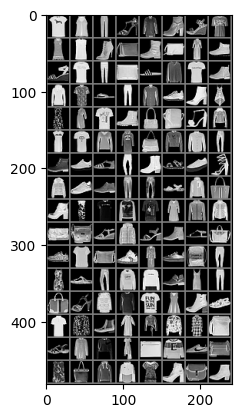

T-shirt/top Shirt Trouser Sandal Shirt Ankle Boot Sandal T-shirt/top Dress Shirt Ankle Boot Bag   Ankle Boot Bag   Dress Ankle Boot Sandal T-shirt/top Trouser Bag   Sandal Pullover T-shirt/top Ankle Boot Pullover Shirt Sandal Trouser Shirt Sneaker Ankle Boot Dress Dress Dress T-shirt/top Ankle Boot Bag   Bag   Sandal Coat  Dress T-shirt/top Pullover Dress Bag   Pullover Shirt Trouser Ankle Boot Sneaker Sandal Trouser Ankle Boot Sandal Sneaker Sandal Coat  Sneaker Ankle Boot Trouser Trouser Sandal Coat  Bag   Ankle Boot Dress T-shirt/top Pullover T-shirt/top Dress Coat  Coat  Bag   Bag   Sandal Coat  Sandal Ankle Boot Sandal Bag   Sneaker Shirt Bag   Sneaker Coat  Sneaker Bag   Trouser Dress Sandal Trouser Pullover Pullover Ankle Boot Dress Trouser Bag   Sandal Coat  Pullover T-shirt/top Dress Ankle Boot Sandal T-shirt/top Pullover Ankle Boot Dress Shirt Coat  Dress Bag   Sandal Shirt Pullover Dress Bag   Pullover Sneaker Bag   Shirt Bag   Pullover Coat  Shirt Ankle Boot Bag   Ankle Boo

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(image):
    image = image / 2 + 0.5     # unnormalize
    np_image = image.numpy()    # convert back from tensor
    plt.imshow(np.transpose(np_image, (1, 2, 0)))   # transpose image to correct shape for visualisation
    plt.show()


# get some random training images
images, labels = next(iter(train_dataloader))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [59]:
# Examine a sample
images, labels = next(iter(train_dataloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [60]:
# Examine a sample
images, labels = next(iter(val_dataloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [61]:
# Examine a sample
images, labels = next(iter(test_dataloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [62]:
from torchvision.models import resnet18, resnet34, resnet50
from torch import nn
model = resnet18(weights=None).to(device)

# Convert model to grayscale
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)

# Update the fully connected layer based on the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, len(classes)).to(device)


In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [64]:
for epoch in range(2):  # loop over the dataset multiple times
    # initiate model training
    print(f'Training - epoch: {epoch + 1}')
    model.train()

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # initiate model validation
    print(f'Validation - epoch {epoch}')
    model.eval()

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in val_dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the dataset: {100 * correct // total} %')

print('Finished Training')

Training - epoch: 1
[1,   100] loss: 0.863
[1,   200] loss: 0.475
[1,   300] loss: 0.429
Validation - epoch 0
Accuracy of the network on the dataset: 85 %
Training - epoch: 2
[2,   100] loss: 0.347
[2,   200] loss: 0.342
[2,   300] loss: 0.334
Validation - epoch 1
Accuracy of the network on the dataset: 86 %
Finished Training


In [65]:
PATH = './fashion_mnist_model.pth'
torch.save(model.state_dict(), PATH)

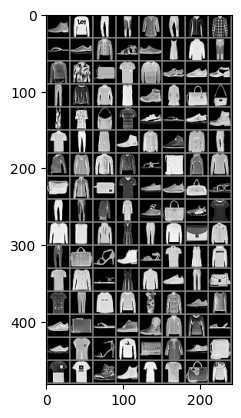

GroundTruth:  Ankle Boot Pullover Trouser Trouser


In [66]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(test_dataloader))

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [67]:
model = resnet18(weights=None).to(device)

# Convert model to grayscale
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)

# Update the fully connected layer based on the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, len(classes)).to(device)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [68]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Shirt Bag   Sandal Bag  


In [69]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 85 %


In [70]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: T-shirt/top is 83.2 %
Accuracy for class: Trouser is 95.7 %
Accuracy for class: Pullover is 77.8 %
Accuracy for class: Dress is 88.4 %
Accuracy for class: Coat  is 76.1 %
Accuracy for class: Sandal is 95.8 %
Accuracy for class: Shirt is 56.2 %
Accuracy for class: Sneaker is 92.7 %
Accuracy for class: Bag   is 96.4 %
Accuracy for class: Ankle Boot is 95.0 %
